Prompt #1:
The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location.
Aggregate these login counts based on 15­minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. 
Please report/illustrate important features of the demand, such as daily cycles.
If there are data quality issues, please report them.

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import dates
import seaborn as sns

In [52]:
data = pd.read_json('logins.json')

In [53]:
data.describe(datetime_is_numeric = True)

,login_time
count,93142
mean,1970-02-26 19:09:39.779648247
min,1970-01-01 20:12:16
25%,1970-02-04 10:37:19.750000
50%,1970-03-01 06:33:05.500000
75%,1970-03-22 04:01:10.750000
max,1970-04-13 18:57:38


In [56]:
#Create new column with time portion of datetime
data['time'] = data['login_time'].dt.strftime('%H:%M:%S')

#Convert back to datetime and then create new dataframe
data.time = pd.to_datetime(data.time, format='%H:%M:%S')
df_time = pd.DataFrame(data.time)

In [58]:
#Resample to find 15-minute windows
df_time = df_time.resample('15T', on='time').count()

In [59]:
df_time

,time
time,
1900-01-01 00:00:00,1439
1900-01-01 00:15:00,1547
1900-01-01 00:30:00,1525
1900-01-01 00:45:00,1482
1900-01-01 01:00:00,1549
...,...
1900-01-01 22:45:00,1637
1900-01-01 23:00:00,1573
1900-01-01 23:15:00,1552


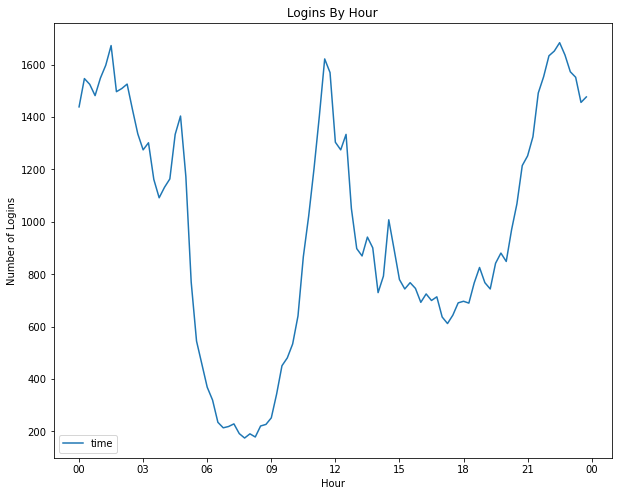

In [79]:
fig, ax = plt.subplots(figsize=(10,8))
plot = sns.lineplot(data=df_time, ax=ax)
ax.xaxis.set_major_formatter(dates.DateFormatter('%H'))
ax.set(xlabel='Hour', ylabel='Number of Logins', title='Logins By Hour')
plt.show()

The lowest login times are from approximately 4:00am-10:00am, which is when people are less likely to need rideshare. Demand rises for lunch time, before tapering to medium demand for the remainder of the work day. Beginning around 7:00pm, demand increases— likely as people are visiting bars and restaurants. Demand stays relatively elevated until around 2:00am, and then dips as most people are at home and do not need rideshare services. 

Prompt #2:

Experiment and metrics design The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities. However, a toll bridge, with a two¬way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.
1.	What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
2.	Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on: a. how you will implement the experiment b. what statistical test(s) you will conduct to verify the significance of the observation c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.

Response: 

The key measure of success would be an increase in the number of drivers with rides completed in both Gotham and Metropolis. As the goal is to increase driver partners operating in both cities, measuring the increase of drivers that log rides in both cities would be a good indicator of program success 

One method of testing this proposal is to utilize A/B testing. This would allow you to test the proposal in a real-world environment and provide accurate answers quickly.

The first step would be to randomly assign drivers to two similarly sized groups: group one would receive toll reimbursement, group two would not receive toll reimbursement. The required sample size for each group would be determined using information from Ultimate’s rider dataset. Ridership numbers would be logged for both groups. To evaluate the success of the program, you would need to determine if there is a difference in inter-city rides between the two groups and if that difference is statistically significant (not attributable to randomness). To do this, we would need to calculate the p-value after the completion of the experiment. If the p-value is high, then we can not reject the Null Hypothesis and find that reimbursing the tolls may not be an effective tool in encouraging riders to operate in both cities. If the p-value is low, then we would assume that the observed difference in ridership is due to the reimbursed tolls and the proposal should be pursued further. 

At the end of the experiment, the resulting significance level would be shared along with details on the sample size, experiment run time, mean, variance, and confidence interval. 


Prompt #3:

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long­term rider retention (again, a few sentences will suffice).

Response:

1.	In preparation for modeling, I completed several cleaning steps including dropping or filling columns with a high number of NaN values. An “active_status” column was created to document whether a rider was considered active or inactive by comparing the “last_trip_date”. Columns with non-numeric values were encoded to allow for modeling. 38% of users in the dataset are active—“active” is defined as riders whose last trip (here “last_trip_date”) was within 30 days of the maximum date.


2.	I selected a Logistic Regression for this problem as it appears to be a classification problem. Logistic regression is used to explore potential relationships between the target variable and other features. In this case, the binary dependent variable is ridership—the user is either active or inactive—while influencing features include city, average distance, percentage of week day rides, etc. I also considered utilizing a Decision Tree for this project, though ultimately proceeded with logistic regression. 

    After training, the model is ~70% accurate at predicting whether a rider will be active or inactive. It is likely that the accuracy of the model could be improved with hyperparameter tuning. Additionally, a few columns with missing data (focusing on driver and rider ratings) were dropped. It is possible that the inclusion of these features may have been helpful in generating a more accurate model. 
    

3.	While correlation is low, a few features do appear to influence rider retention more heavily. For example, the average distance of rides taken in the first 30-days and the average surge multiplier are more heavily weighted toward positively impacting ridership status. The number of trips taken in the first 30-days and whether the user had ordered an “Ultimate Black” car in that same period appear to have a negative correlation with ridership status. 

In [2]:
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
data = pd.read_json('ultimate_data_challenge.json')

In [4]:
data.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [5]:
data.shape

(50000, 12)

In [6]:
#High number of NaN for average rating, dropping both columns for consistency. 
#Also need to fillin missing phone data.
data.isnull().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

In [7]:
data = data.drop(columns = ['avg_rating_of_driver','avg_rating_by_driver'])
data.phone = data.phone.fillna(0).astype(str)

In [8]:
data.dtypes

city                       object
trips_in_first_30_days      int64
signup_date                object
avg_surge                 float64
last_trip_date             object
phone                      object
surge_pct                 float64
ultimate_black_user          bool
weekday_pct               float64
avg_dist                  float64
dtype: object

In [9]:
#Convert float to int for later encoding
data.avg_surge = data.avg_surge.astype(int)
data.surge_pct = data.surge_pct.astype(int)
data.weekday_pct = data.weekday_pct.astype(int)
data.avg_dist = data.avg_dist.astype(int)

In [10]:
#Determining threshold date for active users. If last trip was more than 30 days before this date, then inactive.
data.last_trip_date.max()

'2014-07-01'

In [11]:
#Create column for Inactive/Active status
data['active_status'] = data.last_trip_date.loc[data.last_trip_date >= '2014-06-01'].astype(bool)
data.active_status = data.active_status.fillna('Inactive')
data.active_status = data.active_status.replace(True, 'Active')
data.active_status.unique()

array(['Active', 'Inactive'], dtype=object)

In [12]:
print(round((len(data.active_status.loc[data.active_status == 'Active'])/len(data.active_status)) * 100), '% active users')

38 % active users


In [13]:
data.active_status.value_counts()

Inactive    31196
Active      18804
Name: active_status, dtype: int64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='active_status', ylabel='count'>

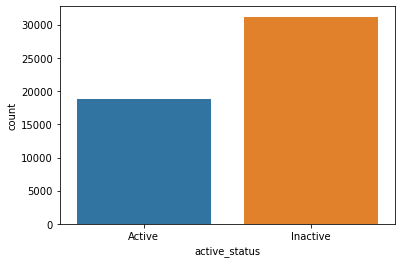

In [14]:
sns.countplot(data['active_status'])

In [15]:
#ProfileReport(data)

In [16]:
#Encode columns that currently have non-numeric data
data.city = LabelEncoder().fit_transform(data.city)
data.phone = LabelEncoder().fit_transform(data.phone)
data.ultimate_black_user = LabelEncoder().fit_transform(data.ultimate_black_user)
data.active_status = LabelEncoder().fit_transform(data.active_status)
data.signup_date = LabelEncoder().fit_transform(data.signup_date)

#Dropping last_trip_date, as it was used to calculate active_status
data = data.drop(columns='last_trip_date')

In [17]:
#Scale
X = data.drop('active_status', axis=1) #Dropping active status, as it is our target variable
y = data.active_status

X = StandardScaler().fit_transform(X)

#Split into test and train
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5)

#Create model
model = LogisticRegression()

#Fit the model on the training data
model.fit(x_train, y_train)

LogisticRegression()

In [18]:
predictions = model.predict(x_test)
print(predictions)

#Print the accuracy score and classification report from the testing data
print(accuracy_score(model.predict(x_test), y_test))

print(classification_report(y_test, predictions))

[1 1 1 ... 1 1 1]
0.7003
              precision    recall  f1-score   support

           0       0.66      0.42      0.52      3763
           1       0.71      0.87      0.78      6237

    accuracy                           0.70     10000
   macro avg       0.69      0.65      0.65     10000
weighted avg       0.69      0.70      0.68     10000



Correlation Between Various Features


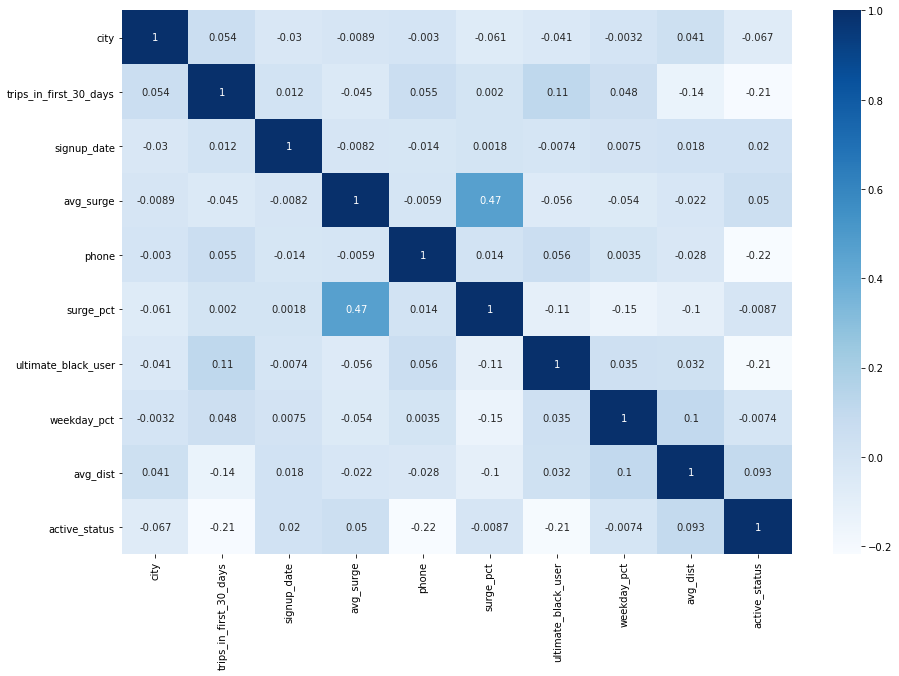

In [20]:
#Visualize correlation between features
plt.figure(figsize=(15,10))
print('Correlation Between Various Features')
p= sns.heatmap(data.corr(), annot=True,cmap ='Blues')